# Description

In [62]:
# tools
import numpy as np
import numpy.random as rand

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# number of groups
num_groups = 2 

# number of samples for each group (dim = m)
num_samples_tot = 100
num_samples = np.r_[70, 30]

# number of cells for each sample
num_cells_tot = 1000

# number of cell types for each sample
# for example: T cell and Bnum_samples_tot cell
num_celltypes = 2

# proportion of cell types (dim = k) 
# each vector sum to one
pi_1 = [0.9, 0.1]
pi_2 = [0.1, 0.9]
pi = np.stack([pi_1, pi_2])

# number of genes / markers / features (dim = p)
# for example: CD3, CD8, IL-1-R
num_features = 3 

# mean value for gene expression measured by an experiment
mu_11 = np.r_[ 0,  0,  0] # first  cell type of group 1
mu_12 = np.r_[10, 10, 10] # second cell type of group 1
mu_21 = np.r_[ 0,  0,  0] # first  cell type of group 2
mu_22 = np.r_[10, 10, 10] # second cell type of group 2
mu = np.stack((mu_11, mu_12, mu_21, mu_22), axis = 0)
mu = np.expand_dims(mu, axis = 0)
mu = mu.reshape(num_groups, num_celltypes, num_features)

# var-cov of mu (mean value of gene expression) 
# --- covariance of sample mean (statistics)
sig2_mu_11 = np.eye(num_features)
sig2_mu_12 = np.eye(num_features)
sig2_mu_21 = np.eye(num_features)
sig2_mu_22 = np.eye(num_features)
sig2_mu = np.stack((sig2_mu_11, sig2_mu_12, sig2_mu_21, sig2_mu_22), axis = 0)
sig2_mu = np.expand_dims(sig2_mu, axis = 0)
sig2_mu = np.expand_dims(sig2_mu, axis = 0)
sig2_mu = sig2_mu.reshape(num_groups, num_celltypes, num_features, num_features)

# var-cov of sample (gene expression) 
# --- covariance of sample value (random variables)
sig2_11 = np.eye(num_features)
sig2_12 = np.eye(num_features)
sig2_21 = np.eye(num_features)
sig2_22 = np.eye(num_features)
sig2 = np.stack((sig2_11, sig2_12, sig2_21, sig2_22), axis = 0)
sig2 = np.expand_dims(sig2, axis = 0)
sig2 = np.expand_dims(sig2, axis = 0)
sig2 = sig2.reshape(num_groups, num_celltypes, num_features, num_features)

In [35]:
# num_groups, num_samples, num_cells, num_celltypes, num_genes / features
print("# of groups:                    ", num_groups)
print("# of samples in total:          ", num_samples_tot)
print("# of samples for each group:    ", num_samples)
print("# of cells for each sample:     ", num_cells_tot)
print("# of cell types for each sample:", num_celltypes)
print("# of genes / markers / features:", num_features)

# pi[group_i]
print("===========")
print("Proportion of cell types in different group")
print("(num_groups, num_celltypes)")
print(pi)

# mu[group_i][celltype_j]
print("===========")
print("mean values of the gene expression for each cell types in each groups")
print("(num_groups, num_celltypes, num_features)")
print(mu)

# sig2_mu[group_i][celltype_j]
print("===========")
print("var-cov of mu (mean value of gene expression)")
print("(num_groups, num_celltypes, num_features, num_features)")
print(sig2_mu)

# sig2[group_i][celltype_j]
print("===========")
print("Var-Cov matrix of features / gene expression")
print("(num_groups, num_celltypes, num_features, num_features)")
print(sig2)

# of groups:                     2
# of samples in total:           100
# of samples for each group:     [70 30]
# of cells for each sample:      1000
# of cell types for each sample: 2
# of genes / markers / features: 3
Proportion of cell types in different group
(num_groups, num_celltypes)
[[0.9 0.1]
 [0.1 0.9]]
mean values of the gene expression for each cell types in each groups
(num_groups, num_celltypes, num_features)
[[[ 0  0  0]
  [10 10 10]]

 [[ 0  0  0]
  [10 10 10]]]
var-cov of mu (mean value of gene expression)
(num_groups, num_celltypes, num_features, num_features)
[[[[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]

  [[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]]


 [[[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]

  [[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]]]
var-cov of sample (gene expression)
(num_groups, num_celltypes, num_features, num_features)
[[[[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]

  [[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]]


 [[[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]]

  [[1. 0.

# Label the samples in each group

In [36]:
# initialization
label_groups = []

# Create labels of each sample
for idx in range(num_groups):
    label_groups += [idx] * num_samples[idx]

print("Group Labels")
print(label_groups)
print("Check Length")
print(len(label_groups) == num_samples_tot)

Group Labels
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Check Length
True


# create number of each cell types based on  πiπi  for each sample in each group

In [37]:
num_cells = np.vstack([
    rand.multinomial(
        num_cells_tot, 
        pvals = pi[idx], 
        size = num_samples[idx]) 
    for idx in range(num_groups)
])

print(num_cells)

[[902  98]
 [911  89]
 [888 112]
 [912  88]
 [889 111]
 [899 101]
 [894 106]
 [908  92]
 [916  84]
 [891 109]
 [915  85]
 [892 108]
 [904  96]
 [911  89]
 [915  85]
 [905  95]
 [911  89]
 [906  94]
 [902  98]
 [896 104]
 [875 125]
 [894 106]
 [905  95]
 [896 104]
 [902  98]
 [878 122]
 [898 102]
 [898 102]
 [898 102]
 [895 105]
 [918  82]
 [883 117]
 [891 109]
 [894 106]
 [890 110]
 [890 110]
 [901  99]
 [888 112]
 [893 107]
 [908  92]
 [891 109]
 [897 103]
 [893 107]
 [899 101]
 [908  92]
 [886 114]
 [906  94]
 [909  91]
 [908  92]
 [906  94]
 [912  88]
 [889 111]
 [902  98]
 [898 102]
 [905  95]
 [920  80]
 [896 104]
 [884 116]
 [901  99]
 [873 127]
 [888 112]
 [902  98]
 [902  98]
 [891 109]
 [897 103]
 [911  89]
 [895 105]
 [905  95]
 [899 101]
 [901  99]
 [ 97 903]
 [ 81 919]
 [100 900]
 [ 94 906]
 [121 879]
 [ 94 906]
 [ 98 902]
 [111 889]
 [117 883]
 [106 894]
 [ 93 907]
 [103 897]
 [ 91 909]
 [112 888]
 [106 894]
 [ 98 902]
 [101 899]
 [ 84 916]
 [ 99 901]
 [ 90 910]
 [102 898]

# create mean value of gene expression for each cell type in each sample

In [52]:
# Generate mean values of gene expression for each sample
# from mulitvariate normal
tmp = [
    rand.multivariate_normal(
        mu[idx_group][idx_celltype], 
        sig2_mu[idx_group][idx_celltype], 
        num_samples[idx_group])         
    for idx_group in range(num_groups) 
    for idx_celltype in range(num_celltypes)]

print(len(tmp))
print(tmp[0].shape)
print(tmp[1].shape)


# arranage the dimension to (num_groups, num_celltypes, num_features)
tmp = np.array(tmp)
tmp = np.expand_dims(tmp, axis = 0)
tmp = tmp.reshape(num_groups, num_celltypes)
tmp = [np.stack(tmp[idx_group], axis = 2) for idx_group in range(num_groups)]
tmp = [np.swapaxes(tmp[idx_group], 1, 2)  for idx_group in range(num_groups)]
tmp = np.array(tmp)
tmp = np.vstack(tmp)

print("==========")
print(tmp.shape)

# assign the result
mean_features = tmp

4
(70, 3)
(70, 3)
(100, 2, 3)


In [54]:
print(mean_features[:6])

[[[ 1.56067933  0.08055152 -0.74937992]
  [10.050592    9.74442801 10.37487618]]

 [[-0.55952154  0.6571186  -0.68219614]
  [10.29785192  9.9049643  10.00998144]]

 [[-0.08546678  1.13448769  1.19964293]
  [ 9.73825726 11.55055395  9.23427608]]

 [[-0.74617779 -0.17447385 -1.67190462]
  [11.81500758 10.32167648  8.71399946]]

 [[ 0.05880802  2.14552491  0.89832189]
  [10.25763579 10.61482682 10.34237327]]

 [[ 0.2126913   2.19896086 -0.61998945]
  [ 9.37484675 10.90032439  9.88856397]]]


# create data for each sample

In [59]:
# initialize a container for all samples
samples = list()

# append array in loop
# note: http://akuederle.com/create-numpy-array-with-for-loop
for idx_sample in range(num_cells.shape[0]): # each sample can be viewed as a fcs file
    a_sample = np.empty((0, 3))
    idx_group = label_groups[idx_sample]
    
    for idx_celltype in range(num_cells.shape[1]): # each sample contains different cell types
        
        a_celltype = rand.multivariate_normal(
            mean_features[idx_sample][idx_celltype], # mean
            sig2[idx_group][idx_celltype],           # var-cov
            num_cells[idx_sample][idx_celltype])     # size
        
        a_sample = np.r_[a_sample, a_celltype]
        
    samples.append(a_sample)

# convert output in an array
samples = np.array(samples)

# Check dimension (num_samples_tot, num_cells_tot, num_features)
print(samples.shape) 

(100, 1000, 3)


# Plot the data

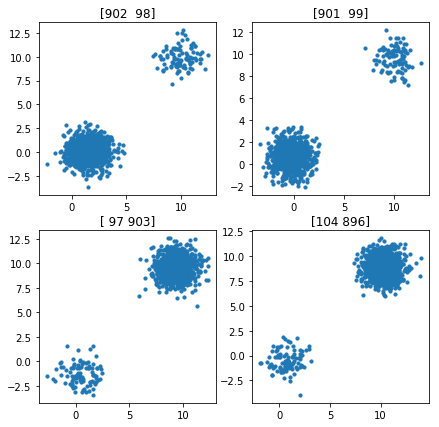

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(7,7))
for idx_data, ax in zip([0, -31, -30, -1], axes.ravel()):
    data = samples[idx_data]
    ax.scatter(data[:, 0], data[:, 1], s=10, alpha=1)
    ax.title.set_text(str(num_cells[idx_data]))
plt.show()

In [64]:
# output the value
#file_Name = "data_simulation"

# open the file for writing
#fileObject = open(file_Name, 'wb') 

# write data to the file
#pickle.dump(samples, fileObject)   

# here we close the fileObject
#fileObject.close()